# Question 1
- Prove if Ziph's law works in Gutenberg books or not.
- Read all the inaugural files using "glob".
- Save the "Word-Rank-Frequency" data in the csv, in sorted order.
- Generate log-log figure using the data in the csv.
- Draw conclusion using the log-log figure.

In [19]:
from collections import Counter # importing counter from collection

In [20]:
import pandas # importing pandas
import glob # importing glob library
import numpy # importing numpy 
import matplotlib.pyplot # importing matplotlib
import string # importing string
import csv # importing csv
import operator # importing operator
import matplotlib.pyplot as plt # importing matplotlib
import os # importing OS
import logging # importing logging

 -------- use of lambda function ---------

In [21]:
# removing all the punctuation, numbers, whitespaces from the words
funcRemPunc = lambda word: ''.join([ch for ch in word if ch.isalpha()])

-------- use of def function ---------

In [22]:
# function to read all the file and collect the words in the wordslist
def funcReadFile(file, wordslist) :
    with open(file) as file: # opening the file
        # adding words in the wordslist
        wordslist.extend([funcRemPunc(word).lower() for line in file for word in line.split() if funcRemPunc(word)])

In [23]:
# function to calculate rank as per given in the PDF
def funcRankZiphs(count, totalCount) :
    return 0.1 * totalCount/count

In [24]:
# function to calculate rank list
def funcRankList(countList) :
    rankList = []
    counter = 1
    for item in countList:
        rankList.append(counter)
        counter = counter + 1
    return rankList

In [25]:
# function to generate the logger
def getLogger(dir):
    logging.basicConfig(level=logging.INFO)
    logger = logging.getLogger()
    # create a file handler
    handler = logging.FileHandler(fileDir+'/ques1.log')
    handler.setLevel(logging.INFO)
    # create a logging format
    formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
    handler.setFormatter(formatter)
    # add the handlers to the logger
    logger.addHandler(handler)
    return logger

In [26]:
fileDir = os.path.dirname(os.path.realpath('__file__'))
logger = getLogger(fileDir)
logger.info("Application started....")
logger.info("Reading all the text books from Gutenberg package..")
filenames = sorted(glob.glob(fileDir+'/gutenberg/*.txt')) # reading all the filenames in the gutenberg package

INFO:root:Application started....
INFO:root:Reading all the text books from Gutenberg package..


In [27]:
wordslist = []
for file in filenames:  # iterating through all the files
    logger.info("Reading words from file : "+file)
    funcReadFile(file, wordslist)
logger.info(str(len(wordslist)) + " number of words found in the gutenberg package.")

INFO:root:Reading words from file : D:\NEU\Spring2017\Python\Assignment 2\Question1/gutenberg\austen-emma.txt
INFO:root:Reading words from file : D:\NEU\Spring2017\Python\Assignment 2\Question1/gutenberg\austen-persuasion.txt
INFO:root:Reading words from file : D:\NEU\Spring2017\Python\Assignment 2\Question1/gutenberg\austen-sense.txt
INFO:root:Reading words from file : D:\NEU\Spring2017\Python\Assignment 2\Question1/gutenberg\bible-kjv.txt
INFO:root:Reading words from file : D:\NEU\Spring2017\Python\Assignment 2\Question1/gutenberg\blake-poems.txt
INFO:root:Reading words from file : D:\NEU\Spring2017\Python\Assignment 2\Question1/gutenberg\bryant-stories.txt
INFO:root:Reading words from file : D:\NEU\Spring2017\Python\Assignment 2\Question1/gutenberg\burgess-busterbrown.txt
INFO:root:Reading words from file : D:\NEU\Spring2017\Python\Assignment 2\Question1/gutenberg\carroll-alice.txt
INFO:root:Reading words from file : D:\NEU\Spring2017\Python\Assignment 2\Question1/gutenberg\chestert

In [28]:
logger.info("Creating a dictionary of words and its count.")
wordFreqDict = dict(Counter(wordslist))  # converting collection to dictionary

INFO:root:Creating a dictionary of words and its count.


In [29]:
logger.info("Sorting wordlist dictionary by value.")
sortedWordList = sorted(wordFreqDict.items(), key=operator.itemgetter(1), reverse = 1) # sorting wordlist dictionary by value

INFO:root:Sorting wordlist dictionary by value.


In [30]:
logger.info("Writing data into the CSV.")
with open('mycsvfile1.csv', 'a') as outcsv:   
    #configure writer to write standard csv file
    writer = csv.writer(outcsv, delimiter=',', quotechar='|', quoting=csv.QUOTE_MINIMAL, lineterminator='\n')
    writer.writerow(['Word', 'ZiphsRank','Rank' , 'Count'])
    counter = 1
    prevCount = 0
    for item in sortedWordList:
        #Write item to outcsv
        writer.writerow([item[0], funcRankZiphs(item[1], len(wordslist)), counter, item[1]])
        counter = counter + 1

INFO:root:Writing data into the CSV.


# Sample Records

<img src="screenshot.JPG">

# Log Log Plot

<img src="screenshot2.JPG">

In [31]:
logger.info("Sorting the words-counts list")
countList = sorted(wordFreqDict.values(), reverse= 1) # sorting the word count list

logger.info("Generating words-ranks list")
rankList = funcRankList(countList) # creating words count rank list

INFO:root:Sorting the words-counts list
INFO:root:Generating words-ranks list


INFO:root:Drawing a plot-plot graph.


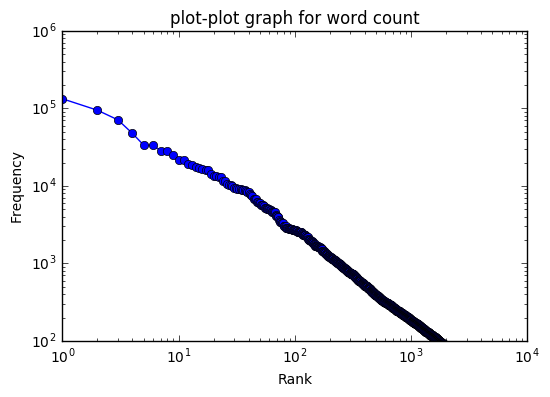

INFO:root:Application finished....


In [33]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xscale("log") # converting to log scale
ax.set_yscale("log") # converting to log scale
ax.set_ylim(1e2, 1e6) # setting limits
ax.set_xlim(1e-0, 1e4) # setting limits
ax.set_xlabel("Rank")
ax.set_ylabel("Frequency")
ax.set_title("plot-plot graph for word count")
logger.info("Drawing a plot-plot graph.")
ax.plot(rankList, countList,  "o-")
plt.show()
logger.info("Application finished....")
logging.shutdown()

# Conclusion : 
- above log-log plot proves the Ziph's law